# Introduction to Machine Learning (CSCI-UA.473)

## Lab 5: Building Neural Networks using PyTorch - MLPs and ConvNets 
### Date: March 30th, 2022

In [1]:
import torch
from plot_lib import set_default, plot_data, plot_model, set_default
from matplotlib import pyplot as plt
import random
from torch import nn, optim
import math
from IPython import display
set_default()

## Classification of non-linearly separable dataset using multi-layer perceptron
We will not demonstrate how to build a linear model and a neural network model using PyTorch and how to train it to classify a toy dataset which is not linearly separable. 

In [3]:
# First lets setup the hyperparameters for our network architecture
seed = 12345
random.seed(seed)
torch.manual_seed(seed)
N = 1000  # num_samples_per_class
D = 2  # dimensions
C = 3  # num_classes
H = 100  # num_hidden_units

# Get our device in a variable
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")

### Create the dataset
We will now create a data set consisting of three classes and is in the shape of a spiral

In [4]:
X = torch.zeros(N * C, D).to(device)
y = torch.zeros(N * C, dtype=torch.long).to(device)
for c in range(C):
    index = 0
    t = torch.linspace(0, 1, N)
    # When c = 0 and t = 0: start of linspace
    # When c = 0 and t = 1: end of linpace
    # This inner_var is for the formula inside sin() and cos() like sin(inner_var) and cos(inner_Var)
    inner_var = torch.linspace(
        # When t = 0
        (2 * math.pi / C) * (c),
        # When t = 1
        (2 * math.pi / C) * (2 + c),
        N
    ) + torch.randn(N) * 0.2
    
    for ix in range(N * c, N * (c + 1)):
        X[ix] = t[index] * torch.FloatTensor((
            math.sin(inner_var[index]), math.cos(inner_var[index])
        ))
        y[ix] = c
        index += 1

print("Shapes:")
print("X:", tuple(X.size()))
print("y:", tuple(y.size()))

Shapes:
X: (3000, 2)
y: (3000,)


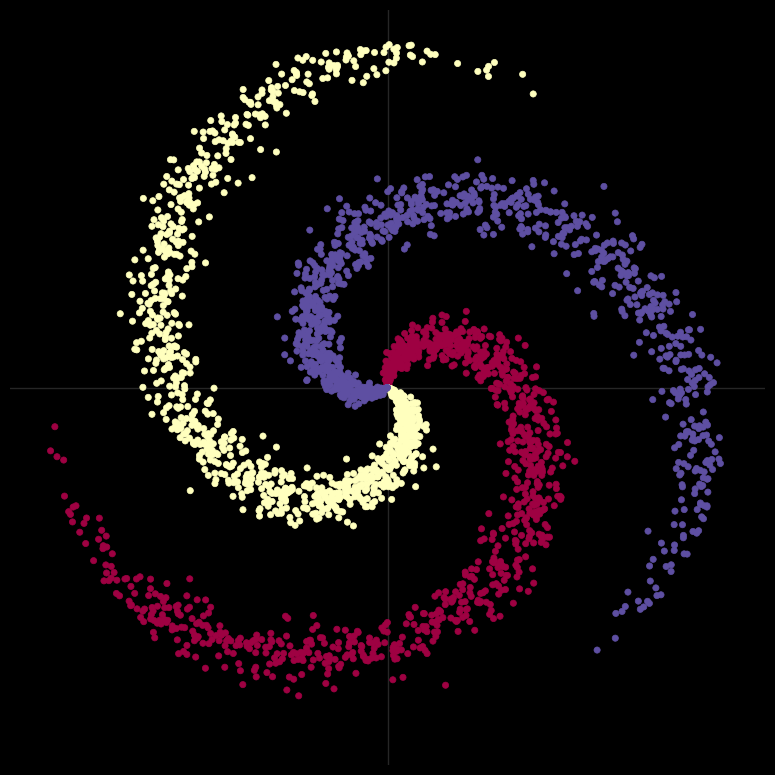

In [5]:
# visualise the data using the plot_data function provided as a helper function
plot_data(X, y)

### Linear Model
We now define a linear classification model using PyTorch and train it using stochastic gradient descent with the help of the autograd package. 

Initialize some training hyper-parameter values, such as, learning rate, regularization coefficient etc

In [6]:
learning_rate = 1e-1
lambda_l2 = 1e-3 # coefficient for the L2 regularizer. You should play with its value to see the effect of regularization

In [7]:
# nn package to create our linear model. Notice the Sequential container class. 
# Each Linear module has a weight and bias
# The order in which the Linear modules are defined is important as it creates the directed acyclic graph
model = nn.Sequential(
    nn.Linear(D, H), # same as linear function
    nn.Linear(H, C)
)

In [8]:
# Print the model
print(model)

Sequential(
  (0): Linear(in_features=2, out_features=100, bias=True)
  (1): Linear(in_features=100, out_features=3, bias=True)
)


## Blueprint for training any PyTorch module
Define a loss, initialize your optimizer, create the training loop and print the metrics (loss and accuracy) at the end of each iteration

In [9]:
# nn package has a variety of loss functions already implemented
# we use cross entropy loss for our classification task
criterion = torch.nn.CrossEntropyLoss()

# nn package also has a variety of optimization algorithms implemented
# we use the stochastic gradient descent for our parameter updates
optimizer = torch.optim.SGD(model.parameters(), lr=learning_rate, weight_decay=lambda_l2) # built-in L2

# Training loop
for t in range(1000):
    
    # Forward pass over the model to get the logits 
    y_pred = model(X)
    
    # Compute the loss and accuracy
    loss = criterion(y_pred, y)
    score, predicted = torch.max(y_pred, 1)
    acc = (y == predicted).sum().float() / len(y)
    print("[EPOCH]: %i, [LOSS]: %.6f, [ACCURACY]: %.3f" % (t, loss.item(), acc))
    display.clear_output(wait=True)
    
    # reset (zero) the gradients before running the backward pass over the model
    # we need to do this because the gradients get accumulated at the same place across iterations
    optimizer.zero_grad()
    
    # Backward pass to compute the gradient of loss w.r.t our learnable params (weights and biases)
    loss.backward()
    
    # Update params
    optimizer.step()

[EPOCH]: 999, [LOSS]: 0.775239, [ACCURACY]: 0.507


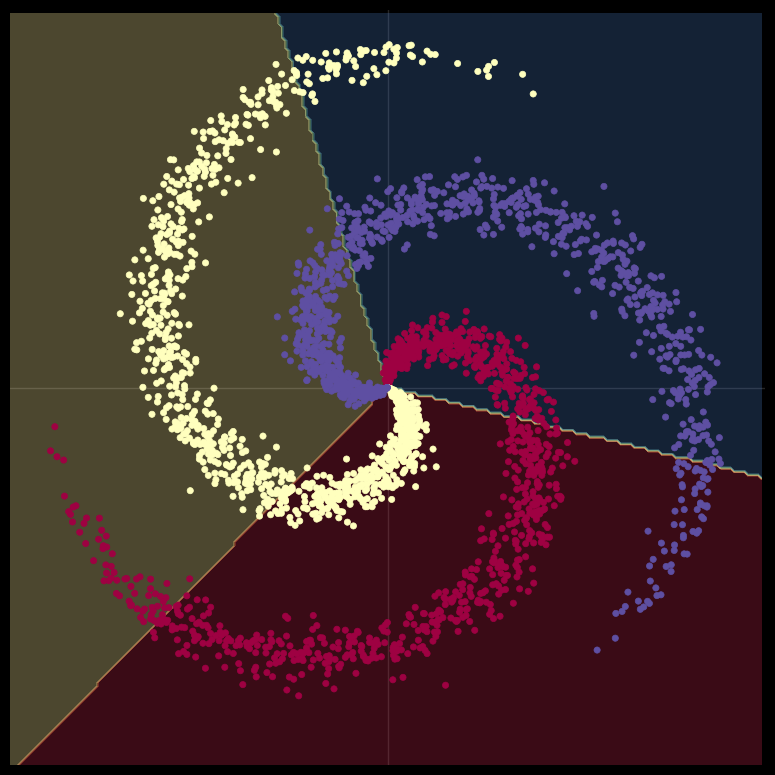

In [10]:
# Plot trained model
plot_model(X, y, model)

### Two layer neural network
We now define a two layer (single hidden layer) neural network model using PyTorch and train it using stochastic gradient descent with the help of the autograd package. 

Initialize the hyper-parameters like before. Play around with the learning rate and the regularization parameter to see their effect on the optimization. 

In [15]:
learning_rate = 1e-1 #large learning_rate, more layers and epochs
lambda_l2 = 1e-5 # higher regularization prevents overfitting

Create and print the two layer MLP with ReLU as the activation units

In [16]:
# nn package to create our linear model
# each Linear module has a weight and bias

model = nn.Sequential(
    nn.Linear(D, H),
    nn.ReLU(), # relu makes it different
    nn.Linear(H, C)
)

print(model)

Sequential(
  (0): Linear(in_features=2, out_features=100, bias=True)
  (1): ReLU()
  (2): Linear(in_features=100, out_features=3, bias=True)
)


Again create the training loop and print the metrics (loss and accuracy) at the end of each iteration, the blueprint remains the same!

In [13]:
# nn package has a variety of loss functions already implemented
# we use cross entropy loss for our classification task
criterion = torch.nn.CrossEntropyLoss()

# nn package also has a variety of optimization algorithms implemented
# we use the stochastic gradient descent for our parameter updates
optimizer = torch.optim.SGD(model.parameters(), lr=learning_rate, weight_decay=lambda_l2) # built-in L2

# e = 1.  # plotting purpose

# Training
for t in range(1000):
    
    # Forward pass over the model to get the logits
    y_pred = model(X)
    
    # Compute the loss and accuracy
    loss = criterion(y_pred, y)
    score, predicted = torch.max(y_pred, 1)
    acc = (y == predicted).sum().float() / len(y)
    print("[EPOCH]: %i, [LOSS]: %.6f, [ACCURACY]: %.3f" % (t, loss.item(), acc))
    display.clear_output(wait=True)
    
    # reset (zero) the gradients before running the backward pass over the model
    # we need to do this because the gradients get accumulated at the same place across iterations
    optimizer.zero_grad()
    
    # Backward pass to compute the gradient of loss w.r.t our learnable params (weights and biases)
    loss.backward()
    
    # Update params
    optimizer.step()

[EPOCH]: 999, [LOSS]: 0.377856, [ACCURACY]: 0.820


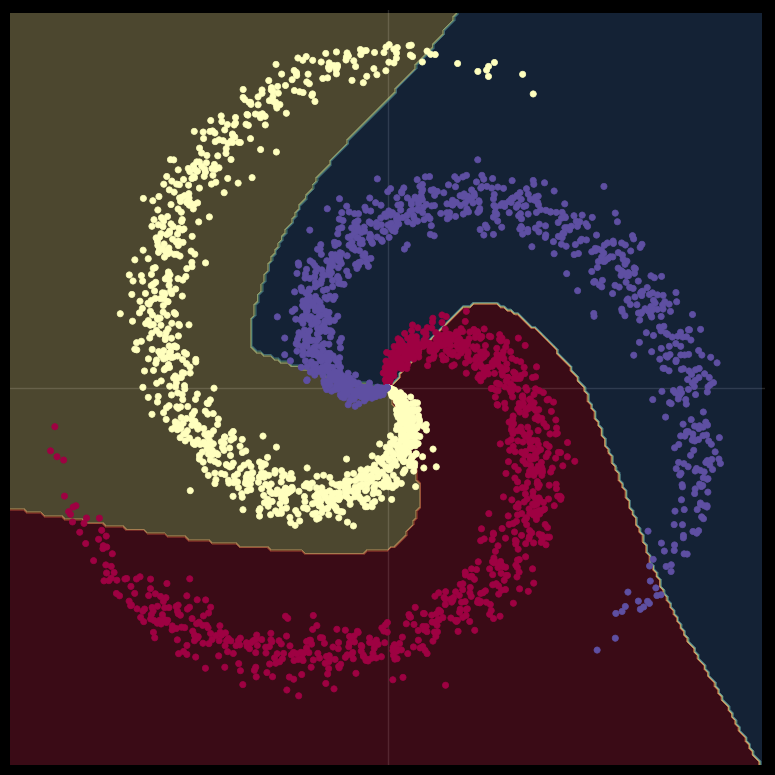

In [14]:
# Plot trained model
plot_model(X, y, model)

## Regression

We will now demonstrate how to build a linear model and a neural network model for a regression task using PyTorch.  

In [10]:
import random
import torch
from torch import nn, optim
import math
from IPython import display
from plot_lib import plot_data, plot_model, set_default
from matplotlib import pyplot as plt
set_default()

### Create the data

In [15]:
seed = 1
random.seed(seed)
torch.manual_seed(seed)
N = 1000  # num_samples_per_class
D = 21  # dimensions
C = 1  # num_classes
H = 100  # num_hidden_units

In [19]:
X = torch.unsqueeze(torch.linspace(-1, 1, 100), dim=1).to(device)
y = X.pow(3) + 0.3 * torch.rand(X.size()).to(device)
print("Shapes:")
print("X:", tuple(X.size()))
print("y:", tuple(y.size()))

Shapes:
X: (100, 1)
y: (100, 1)


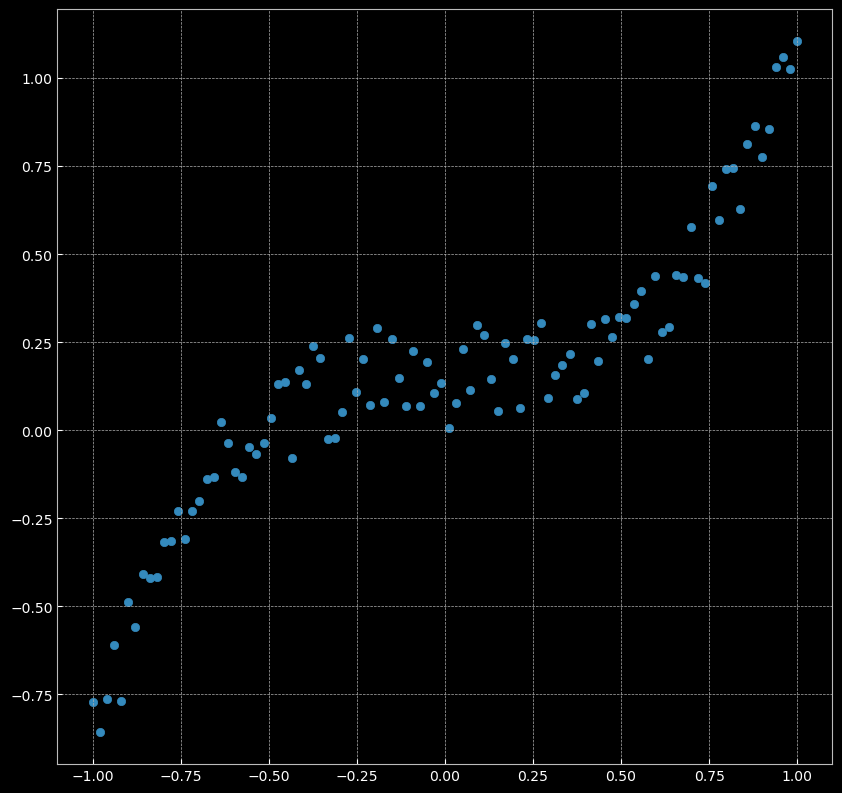

In [20]:
plt.scatter(X.cpu().numpy(), y.cpu().numpy())
plt.axis('equal');

### Linear model

Initialize the values of the hyper-parameters

In [21]:
learning_rate = 1e-3
lambda_l2 = 1e-5

Create the model and print it

In [22]:
# nn package to create our linear model
# each Linear module has a weight and bias
model = nn.Sequential(
    nn.Linear(D, H),
    nn.Linear(H, C)
)

# print the model
print(model)

Sequential(
  (0): Linear(in_features=1, out_features=100, bias=True)
  (1): Linear(in_features=100, out_features=1, bias=True)
)


Create the training loop

In [23]:
# we use MSE (mean squared error) loss from the nn package for our regression task
criterion = torch.nn.MSELoss()

# we use the optim package to apply stochastic gradient descent for our parameter updates
optimizer = torch.optim.SGD(model.parameters(), lr=learning_rate, weight_decay=lambda_l2) # built-in L2

# Training loop
for t in range(1000):
    
    # forward pass over the model to get the logits (inputs to the loss function)
    y_pred = model(X)
    
    # Compute the loss (MSE)
    loss = criterion(y_pred, y)
    print("[EPOCH]: %i, [LOSS or MSE]: %.6f" % (t, loss.item()))
    display.clear_output(wait=True)
    
    # zero the gradients before running the backward pass
    optimizer.zero_grad()
    
    # Backward pass to compute the gradient of loss w.r.t our learnable params 
    loss.backward()
    
    # Update params
    optimizer.step()

[EPOCH]: 999, [LOSS or MSE]: 0.029701


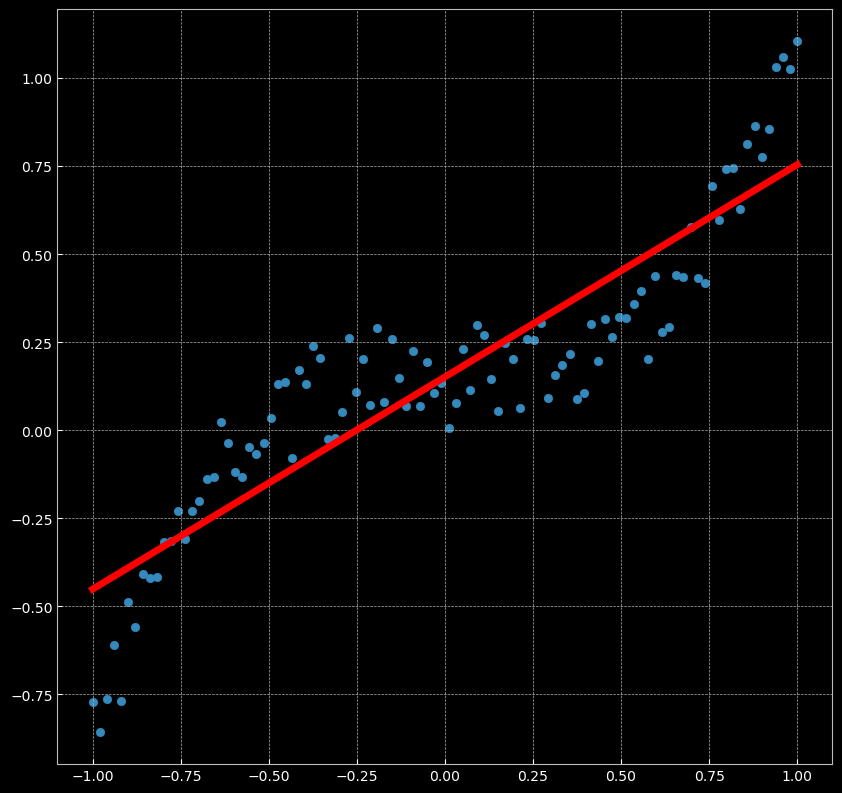

In [24]:
# Plot trained model
plt.scatter(X.data.cpu().numpy(), y.data.cpu().numpy())
plt.plot(X.data.cpu().numpy(), y_pred.data.cpu().numpy(), 'r-', lw=5)
plt.axis('equal');

Play around with the values of the hyper-parameters and the value of H (number of hidden units) to observe the change in the models being learnt

### Two-layered network
We now implement a two layer MLP for the regression task. We will built 10 seperate models, each with the same architecture but having different initial values of the parameters (weights and biases). This is to show the effect of local minima on model training

In [25]:
import pandas as pd
import numpy as np
from sklearn import model_selection

df = pd.read_csv("diabetes.csv")
# extract our y out BMI: 
y = df["BMI"]
# get all other predictors
X = df.loc[:, df.columns != 'BMI']

# normalize them to have them in the same scale
X = (X - np.mean(X, axis=0))/np.std(X, axis=0)
# split our train-test set
xTrain, xTest, yTrain, yTest = model_selection.train_test_split(X, y, test_size=0.2, random_state=0)
xTrain = (xTrain.to_numpy())
xTest = (xTest.to_numpy())
yTrain = (yTrain.to_numpy().reshape(-1,1))
yTest = (yTest.to_numpy().reshape(-1,1))
xTrain, xTest, yTrain, yTest = torch.from_numpy(xTrain), torch.from_numpy(xTest),torch.from_numpy(yTrain),torch.from_numpy(yTest)
X = xTrain
y = yTrain

In [26]:
learning_rate = 1e-3
lambda_l2 = 1e-5

Create the models. Half of the models have ReLU activations and the other half have TanH activations.

In [27]:
# Number of networks
n_networks = 2
models = list()
y_pretrain = list()

# nn package also has different loss functions.
# we use MSE for a regression task
criterion = torch.nn.MSELoss()

for mod in range(n_networks):
    # nn package to create our linear model
    # each Linear module has a weight and bias
    model = nn.Sequential(
        nn.Linear(D, H),
        nn.ReLU() if mod < n_networks // 2 else nn.Tanh(),
        nn.Linear(H, C)
    )
    
    # Append models
    models.append(model)

Print the models

In [28]:
print(models[0], models[-1])

Sequential(
  (0): Linear(in_features=21, out_features=100, bias=True)
  (1): ReLU()
  (2): Linear(in_features=100, out_features=1, bias=True)
) Sequential(
  (0): Linear(in_features=21, out_features=100, bias=True)
  (1): Tanh()
  (2): Linear(in_features=100, out_features=1, bias=True)
)


Create the training loop over the 10 models

In [29]:
for mod in range(n_networks):
    # select the i-th model
    model = models[mod]
    
    # while we could simply use the stochastic gradient descent optimized, we will use the ADAM optimizer
    # because of its robustness and speed
    optimizer = torch.optim.Adam(model.parameters(), lr=learning_rate, weight_decay=lambda_l2) # built-in L2

    # Training loop
    for t in range(1000):
        
        X = X.float()
        # Feed forward to get the logits
        y_pred = model(X)
        
        # Append pre-train output
#         if t == 0:
#             y_pretrain.append(y_pred.detach())

        # Compute the loss and accuracy
        loss = criterion(y_pred, y)
        print(f"[MODEL]: {mod + 1}, [EPOCH]: {t}, [LOSS]: {loss.item():.6f}")
        display.clear_output(wait=True)

        # zero the gradients before running
        # the backward pass.
        optimizer.zero_grad()

        # Backward pass to compute the gradient
        # of loss w.r.t our learnable params. 
        loss.backward()

        # Update params
        optimizer.step()

RuntimeError: Found dtype Long but expected Float

### Predictions: Before Training
Show the model predictions before training

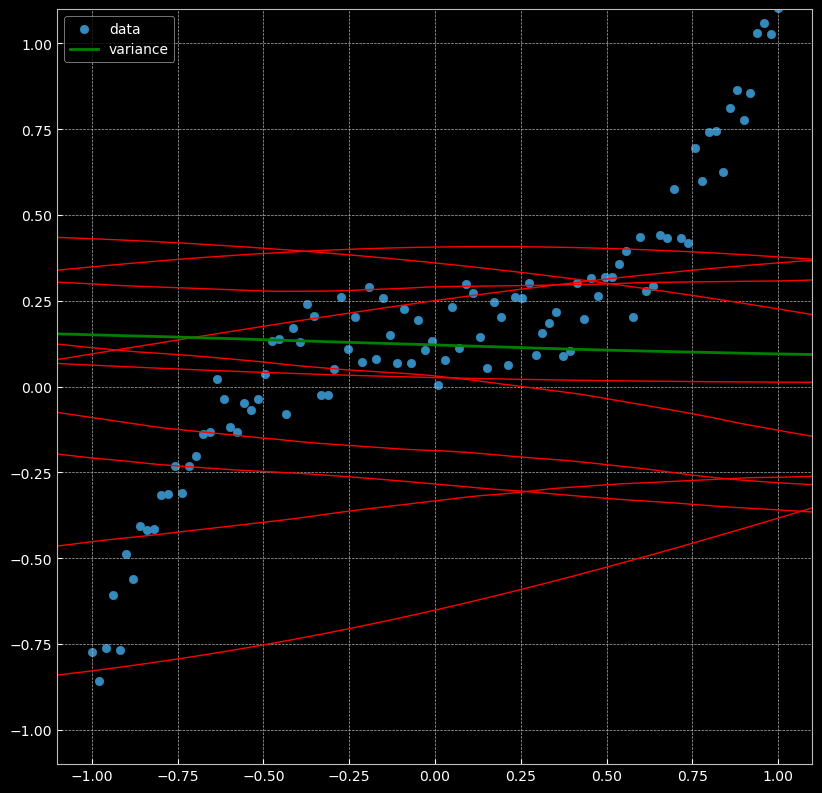

In [29]:
for y_pretrain_idx in y_pretrain:
    # New X that ranges from -5 to 5 instead of -1 to 1
    X_new = torch.unsqueeze(torch.linspace(-2, 2, 100), dim=1)
        
    plt.plot(X_new.numpy(), y_pretrain_idx.cpu().numpy(), 'r-', lw=1)

plt.scatter(X.cpu().numpy(), y.cpu().numpy(), label='data')
plt.axis('square')
plt.axis((-1.1, 1.1, -1.1, 1.1));
y_combo = torch.stack(y_pretrain)
plt.plot(X_new.numpy(), y_combo.var(dim=0).cpu().numpy(), 'g', label='variance');
plt.legend()

## Predictions: After Training

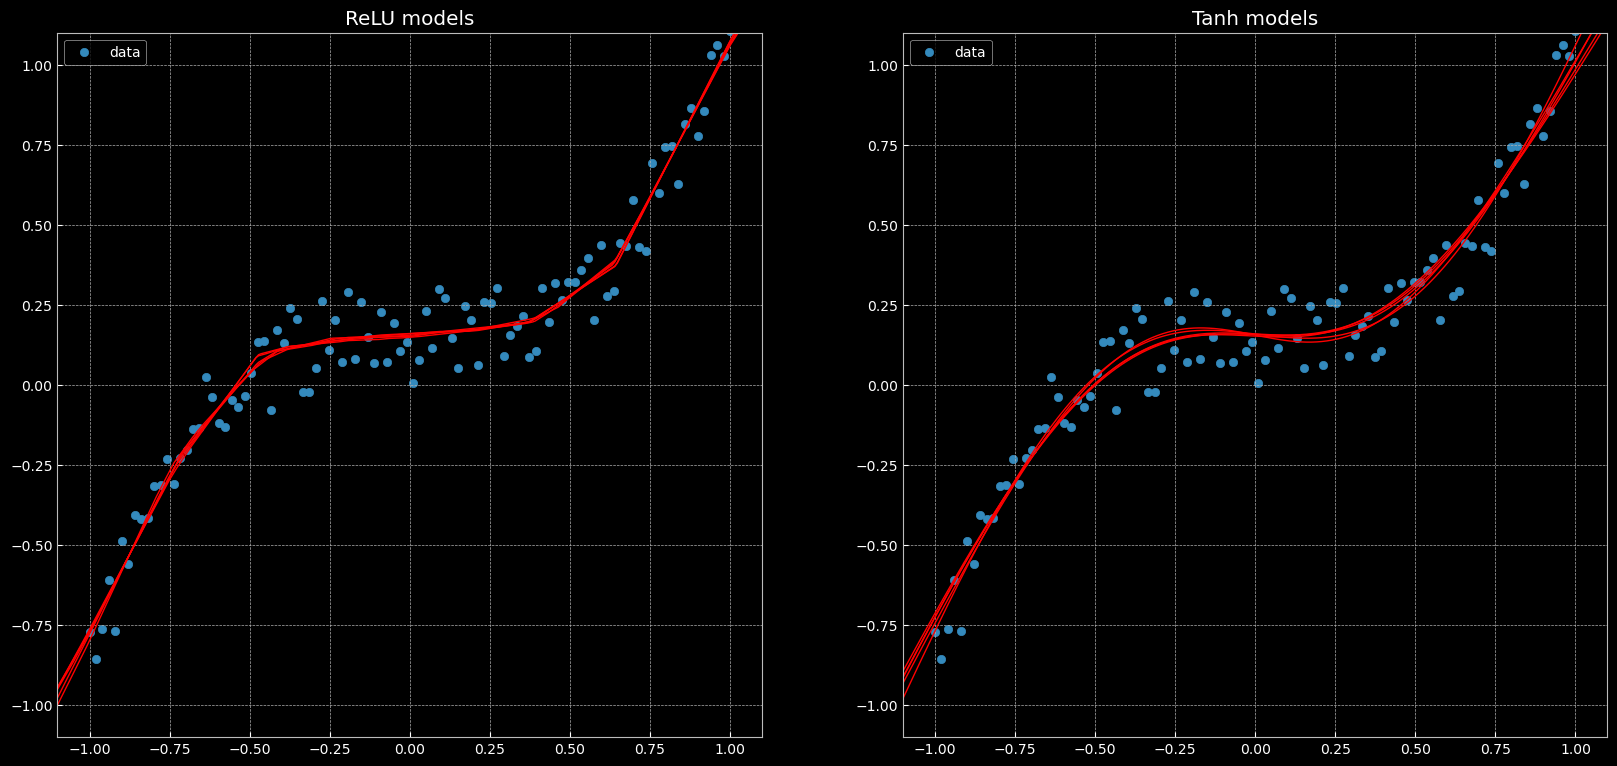

In [78]:
y_pred = list()
relu_models = models[:n_networks // 2]
tanh_models = models[n_networks // 2:]
plt.figure(figsize=(20, 10))

def dense_prediction(models, non_linearity, zoom):
    plt.subplot(1, 2, 1 if non_linearity == 'ReLU' else 2)
    for model in models:
        # New X that ranges from -5 to 5 instead of -1 to 1
        X_new = torch.unsqueeze(torch.linspace(-4, 4, 1001), dim=1).to(device)

        # Getting predictions from input
        with torch.no_grad():
            y_pred.append(model(X_new))

        plt.plot(X_new.cpu().numpy(), y_pred[-1].cpu().numpy(), 'r-', lw=1)
    plt.scatter(X.cpu().numpy(), y.cpu().numpy(), label='data')
    plt.axis('square')
    plt.axis(torch.tensor((-1.1, 1.1, -1.1, 1.1)) * zoom);
    y_combo = torch.stack(y_pred)
    plt.legend()
    plt.title(non_linearity + ' models')

z = 1  # try 1 or 4
dense_prediction(relu_models, 'ReLU', zoom=z)
dense_prediction(tanh_models, 'Tanh', zoom=z)

## Convolutional Neural Networks (CNNs)

We will test the following assumptions pertaining to CNNs 

* Compositionality obtained using many layers
* Locality + stationarity of images assumed by the convolutional layers
* Invariance of object class to translations assumed by the pooling layers

In [80]:
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
from torchvision import datasets, transforms
import matplotlib.pyplot as plt
import numpy
from plot_lib import plot_data, plot_model, set_default

set_default()

# function to count number of parameters
def get_n_params(model):
    np=0
    for p in list(model.parameters()):
        np += p.nelement()
    return np

### Load the Dataset (MNIST)

Load the MNIST handwritten digits dataset. We can use the PyTorch DataLoader utilities for this. This will download, shuffle, normalize data and arrange it in batches. Normalizing involves subtracting some coefficient (usually the mean) from each pixel values and dividing the resulting pixel values by another coefficient (usually the variance of the original pixel values). We also display some images.

In [82]:
input_size  = 28*28   # images are 28x28 pixels
output_size = 10      # there are 10 classes

train_loader = torch.utils.data.DataLoader(
    datasets.MNIST('./data', train=True, download=True,
                   transform=transforms.Compose([
                       transforms.ToTensor(),
                       transforms.Normalize((0.1307,), (0.3081,))
                   ])),
    batch_size=64, shuffle=True)

test_loader = torch.utils.data.DataLoader(
    datasets.MNIST('./data', train=False, transform=transforms.Compose([
                       transforms.ToTensor(),
                       transforms.Normalize((0.1307,), (0.3081,))
                   ])),
    batch_size=1000, shuffle=True)

0.1%

100.0%


Extracting ./data/MNIST/raw/train-images-idx3-ubyte.gz to ./data/MNIST/raw


102.8%


Extracting ./data/MNIST/raw/train-labels-idx1-ubyte.gz to ./data/MNIST/raw




6.3%

100.0%


Extracting ./data/MNIST/raw/t10k-images-idx3-ubyte.gz to ./data/MNIST/raw


112.7%


Extracting ./data/MNIST/raw/t10k-labels-idx1-ubyte.gz to ./data/MNIST/raw



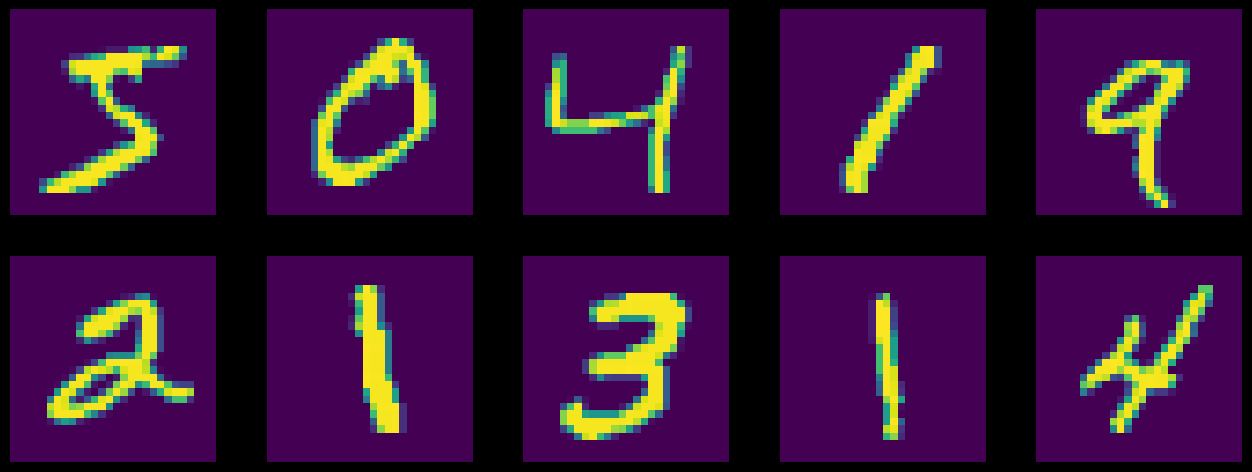

In [83]:
# show some images
plt.figure(figsize=(16, 6))
for i in range(10):
    plt.subplot(2, 5, i + 1)
    image, _ = train_loader.dataset.__getitem__(i)
    plt.imshow(image.squeeze().numpy())
    plt.axis('off');

### Create the model classes
For comparison purposes we will create two models classes: 
1. Multi-layer Perceptron
2. Convolutional Neural Network

Pay special attention to the order of the layer while creating CNNs.

In [84]:
class FC2Layer(nn.Module):
    def __init__(self, input_size, n_hidden, output_size):
        super(FC2Layer, self).__init__()
        self.input_size = input_size
        self.network = nn.Sequential(
            nn.Linear(input_size, n_hidden), 
            nn.ReLU(), 
            nn.Linear(n_hidden, n_hidden), 
            nn.ReLU(), 
            nn.Linear(n_hidden, output_size), 
            nn.LogSoftmax(dim=1)
        )

    def forward(self, x):
        x = x.view(-1, self.input_size)
        return self.network(x)
    
class CNN(nn.Module):
    def __init__(self, input_size, n_feature, output_size):
        super(CNN, self).__init__()
        self.n_feature = n_feature
        self.conv1 = nn.Conv2d(in_channels=1, out_channels=n_feature, kernel_size=5)
        self.conv2 = nn.Conv2d(n_feature, n_feature, kernel_size=5)
        self.fc1 = nn.Linear(n_feature*4*4, 50)
        self.fc2 = nn.Linear(50, 10)
        
    def forward(self, x, verbose=False):
        x = self.conv1(x)
        x = F.relu(x) # Will it make a difference if we apply the non-linearity after the pooling layer?
        x = F.max_pool2d(x, kernel_size=2)
        x = self.conv2(x)
        x = F.relu(x)
        x = F.max_pool2d(x, kernel_size=2)
        x = x.view(-1, self.n_feature*4*4) # this is where are flattening the 2D feature maps into a single 1D vector so as to be used by the subsequent fully connected layer
        x = self.fc1(x)
        x = F.relu(x)
        x = self.fc2(x)
        x = F.log_softmax(x, dim=1)
        return x

In [85]:
accuracy_list = []
def train(epoch, model, perm=torch.arange(0, 784).long()):
    model.train()
    for batch_idx, (data, target) in enumerate(train_loader):
        # send data to device, where the "device" is either a GPU if it exists or a CPU
        data, target = data.to(device), target.to(device)
        
        # permute pixels
        data = data.view(-1, 28*28)
        data = data[:, perm]
        data = data.view(-1, 1, 28, 28)

        optimizer.zero_grad()
        # forward pass through the model
        output = model(data)
        # forward pass through the cross-entropy loss function
        loss = F.nll_loss(output, target)
        # backward pass through the cross-entropy loss function and the model
        loss.backward()
        
        optimizer.step()
        if batch_idx % 100 == 0:
            print('Train Epoch: {} [{}/{} ({:.0f}%)]\tLoss: {:.6f}'.format(
                epoch, batch_idx * len(data), len(train_loader.dataset),
                100. * batch_idx / len(train_loader), loss.item()))
            
def test(model, perm=torch.arange(0, 784).long()):
    model.eval()
    test_loss = 0
    correct = 0
    with torch.no_grad():
        for data, target in test_loader:
            # send data to device, where the "device" is either a GPU if it exists or a CPU
            data, target = data.to(device), target.to(device)

            # permute pixels
            data = data.view(-1, 28*28)
            data = data[:, perm]
            data = data.view(-1, 1, 28, 28)
            output = model(data)
            test_loss += F.nll_loss(output, target, reduction='sum').item() # sum up batch loss                                                               
            pred = output.data.max(1, keepdim=True)[1] # get the index of the max log-probability                                                                 
            correct += pred.eq(target.data.view_as(pred)).cpu().sum().item()

        test_loss /= len(test_loader.dataset)
        accuracy = 100. * correct / len(test_loader.dataset)
        accuracy_list.append(accuracy)
        print('\nTest set: Average loss: {:.4f}, Accuracy: {}/{} ({:.0f}%)\n'.format(
            test_loss, correct, len(test_loader.dataset),
            accuracy))

### Train a small MLP


In [86]:
n_hidden = 8 # number of hidden units

model_fnn = FC2Layer(input_size, n_hidden, output_size)
model_fnn.to(device)
optimizer = optim.SGD(model_fnn.parameters(), lr=0.01, momentum=0.5)
print('Number of parameters: {}'.format(get_n_params(model_fnn)))

for epoch in range(0, 1):
    train(epoch, model_fnn)
    test(model_fnn)

Number of parameters: 6442
Train Epoch: 0 [0/60000 (0%)]	Loss: 2.248471
Train Epoch: 0 [6400/60000 (11%)]	Loss: 1.836890
Train Epoch: 0 [12800/60000 (21%)]	Loss: 1.306150
Train Epoch: 0 [19200/60000 (32%)]	Loss: 0.817851
Train Epoch: 0 [25600/60000 (43%)]	Loss: 0.754793
Train Epoch: 0 [32000/60000 (53%)]	Loss: 0.598321
Train Epoch: 0 [38400/60000 (64%)]	Loss: 0.459407
Train Epoch: 0 [44800/60000 (75%)]	Loss: 0.629859
Train Epoch: 0 [51200/60000 (85%)]	Loss: 0.635549
Train Epoch: 0 [57600/60000 (96%)]	Loss: 0.338657

Test set: Average loss: 0.4391, Accuracy: 8646/10000 (86%)



### Train a ConvNet with the same number of parameters
Play around with the hyper-parameters to understand their relationship with model performance. 

In [87]:
# Training settings 
n_features = 6 # number of feature maps

model_cnn = CNN(input_size, n_features, output_size)
model_cnn.to(device)
optimizer = optim.SGD(model_cnn.parameters(), lr=0.01, momentum=0.5)
print('Number of parameters: {}'.format(get_n_params(model_cnn)))

for epoch in range(0, 1):
    train(epoch, model_cnn)
    test(model_cnn)

Number of parameters: 6422
Train Epoch: 0 [0/60000 (0%)]	Loss: 2.356653
Train Epoch: 0 [6400/60000 (11%)]	Loss: 1.107337
Train Epoch: 0 [12800/60000 (21%)]	Loss: 0.313339
Train Epoch: 0 [19200/60000 (32%)]	Loss: 0.381093
Train Epoch: 0 [25600/60000 (43%)]	Loss: 0.379141
Train Epoch: 0 [32000/60000 (53%)]	Loss: 0.415001
Train Epoch: 0 [38400/60000 (64%)]	Loss: 0.214281
Train Epoch: 0 [44800/60000 (75%)]	Loss: 0.253223
Train Epoch: 0 [51200/60000 (85%)]	Loss: 0.190708
Train Epoch: 0 [57600/60000 (96%)]	Loss: 0.254340

Test set: Average loss: 0.1813, Accuracy: 9444/10000 (94%)



### ConvNet performs better with the same number of parameters, thanks to its use of prior knowledge about images

* Use of convolution: Locality and stationarity in images
* Pooling: builds in some translation invariance

### What happens if the assumptions are no longer true?
Let us break the assumption of locality and permute the pixel within each image using an arbitrary permutation matrix. Also display the permuted images. 

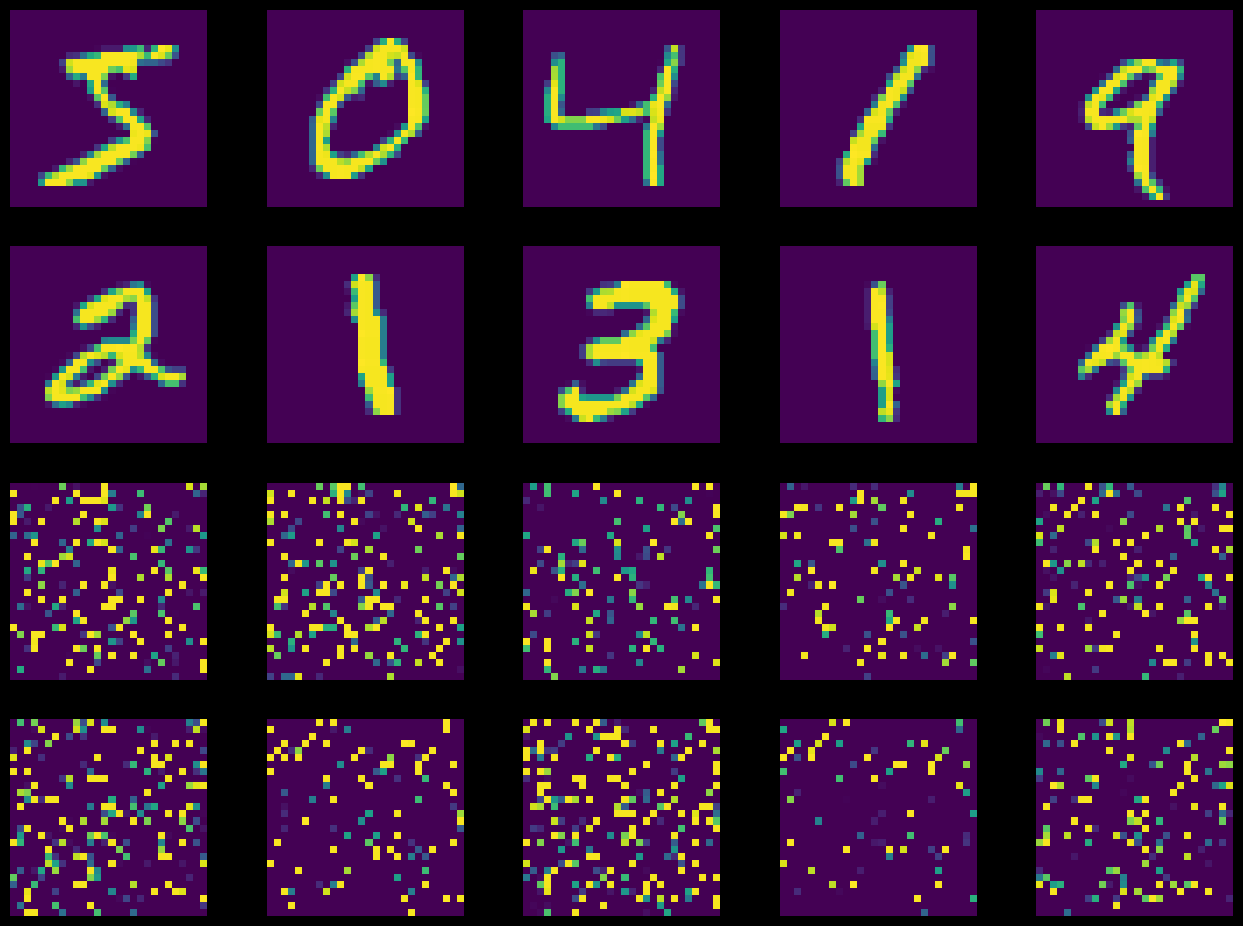

In [88]:
perm = torch.randperm(784)
plt.figure(figsize=(16, 12))
for i in range(10):
    image, _ = train_loader.dataset.__getitem__(i)
    # permute pixels
    image_perm = image.view(-1, 28*28).clone()
    image_perm = image_perm[:, perm]
    image_perm = image_perm.view(-1, 1, 28, 28)
    plt.subplot(4, 5, i + 1)
    plt.imshow(image.squeeze().numpy())
    plt.axis('off')
    plt.subplot(4, 5, i + 11)
    plt.imshow(image_perm.squeeze().numpy())
    plt.axis('off')

### CNNs with permuted pixels
What do you think will happen to CNNs when given permuted pixels as inputs? 

In [89]:
# Training settings 
n_features = 6 # number of feature maps

model_cnn = CNN(input_size, n_features, output_size)
model_cnn.to(device)
optimizer = optim.SGD(model_cnn.parameters(), lr=0.01, momentum=0.5)
print('Number of parameters: {}'.format(get_n_params(model_cnn)))

for epoch in range(0, 1):
    train(epoch, model_cnn, perm)
    test(model_cnn, perm)

Number of parameters: 6422
Train Epoch: 0 [0/60000 (0%)]	Loss: 2.312502
Train Epoch: 0 [6400/60000 (11%)]	Loss: 2.259894
Train Epoch: 0 [12800/60000 (21%)]	Loss: 2.208505
Train Epoch: 0 [19200/60000 (32%)]	Loss: 1.825406
Train Epoch: 0 [25600/60000 (43%)]	Loss: 1.282880
Train Epoch: 0 [32000/60000 (53%)]	Loss: 1.020077
Train Epoch: 0 [38400/60000 (64%)]	Loss: 1.142344
Train Epoch: 0 [44800/60000 (75%)]	Loss: 0.676567
Train Epoch: 0 [51200/60000 (85%)]	Loss: 0.658803
Train Epoch: 0 [57600/60000 (96%)]	Loss: 0.678375

Test set: Average loss: 0.5849, Accuracy: 8128/10000 (81%)



### MLPs with permuted pixels

In [ ]:
n_hidden = 8    # number of hidden units

model_fnn = FC2Layer(input_size, n_hidden, output_size)
model_fnn.to(device)
optimizer = optim.SGD(model_fnn.parameters(), lr=0.01, momentum=0.5)
print('Number of parameters: {}'.format(get_n_params(model_fnn)))

for epoch in range(0, 1):
    train(epoch, model_fnn, perm)
    test(model_fnn, perm)

Number of parameters: 6442
Train Epoch: 0 [0/60000 (0%)]	Loss: 2.363595
Train Epoch: 0 [6400/60000 (11%)]	Loss: 1.608681
Train Epoch: 0 [12800/60000 (21%)]	Loss: 1.104552
Train Epoch: 0 [19200/60000 (32%)]	Loss: 0.803326
Train Epoch: 0 [25600/60000 (43%)]	Loss: 0.764967
Train Epoch: 0 [32000/60000 (53%)]	Loss: 0.406883
Train Epoch: 0 [38400/60000 (64%)]	Loss: 0.336167
Train Epoch: 0 [44800/60000 (75%)]	Loss: 0.331127
Train Epoch: 0 [51200/60000 (85%)]	Loss: 0.566488
